# Analyzing the geothermal results
I have reduced all the simulation results to a single data file of the recovery factors and CO2 emission. In this notebook, I'm going to analyze the data.

In [1]:
using Dierckx, DataFrames, PyPlot

In [2]:
df_geo = readtable("geothermal_final_results.csv")

,q_m3_s,k_m2,L_m,t_life_s,R_th,R_pr,R_ze,c_CO2,COP,c_CO2_heat
1,0.013888888888888888,2.0e-14,500.0,1.0654434782608696e9,0.09334573190759521,-2.21046167019434,-3.0658386294977835,0.19008376873409852,2.4828391518700843,0.022152059249820423
2,0.013888888888888888,2.0e-14,650.0,1.4323147826086957e9,0.04455609920618009,-2.4116455288397156,-3.322348049270637,0.20237833787353815,2.3273071622684314,0.02363246282729237
3,0.013888888888888888,2.0e-14,800.0,1.77552e9,-0.006047878544980346,-2.6152658854119255,-3.5819640039002056,0.21482180410850654,2.1884938373737692,0.025131439285203085
4,0.013888888888888888,2.0e-14,900.0,2.0240452173913043e9,-0.04531923221310525,-2.7716069426544054,-3.781298851884367,0.22437597982888036,2.095362537709816,0.026248441026398114
5,0.013888888888888888,2.0e-14,1000.0,2.248904347826087e9,-0.08103264847814,-2.9132655469545408,-3.961913572367039,0.2330328945361108,2.016113384445557,0.027280211730316608
6,0.013888888888888888,5.0e-14,500.0,1.0654434782608696e9,0.5520121857631767,-0.41879583482095634,-0.7814646893967193,0.080593078794614,5.85592994096954,0.009392188867425879
7,0.013888888888888888,5.0e-14,650.0,1.4323147826086957e9,0.5383124230155587,-0.48290988895942827,-0.8632101084232711,0.08451115988085393,5.573187681776786,0.009868678957257987
8,0.013888888888888888,5.0e-14,800.0,1.77552e9,0.5213433103815216,-0.5551440536678244,-0.955308668426476,0.08892546994636703,5.286856450780926,0.010403157436187983
9,0.013888888888888888,5.0e-14,900.0,2.0240452173913043e9,0.5072390765218356,-0.6131760491584595,-1.0292994626770358,0.09247186967079475,5.084238311279987,0.010817746264563555
10,0.013888888888888888,5.0e-14,1000.0,2.248904347826087e9,0.49413854621239206,-0.6665030676945949,-1.0972914113106083,0.09573074302578079,4.907731026011217,0.011206808137711148


# Sensitivity analysis

## Step 1
Find a list of permeability, well-spacing, and flow rates

In [3]:
flow_rates = df_geo[:q_m3_s] # [m^3/s]
k          = df_geo[:k_m2]   # [m^2]
L          = df_geo[:L_m]    # [m]
flow_range = union(flow_rates)
k_range    = union(k)
L_range    = union(L)

5-element Array{Float64,1}:
  500.0
  650.0
  800.0
  900.0
 1000.0

## Step 2
For a fixed value of well spacing, plot the effect of perm for different flow rates, and see if the results look good:
### Effect of permeability

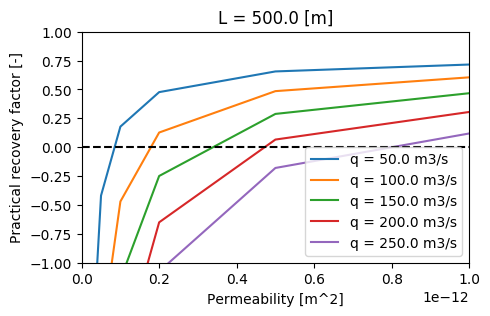

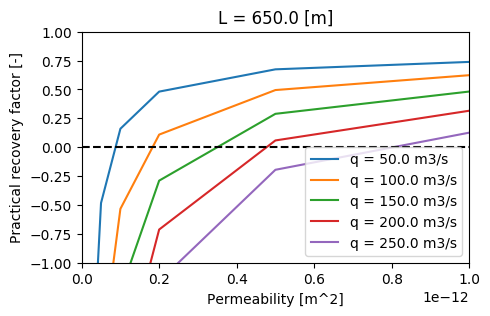

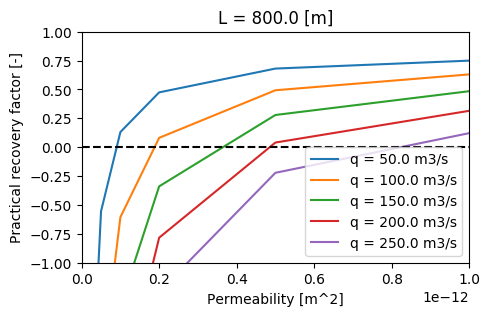

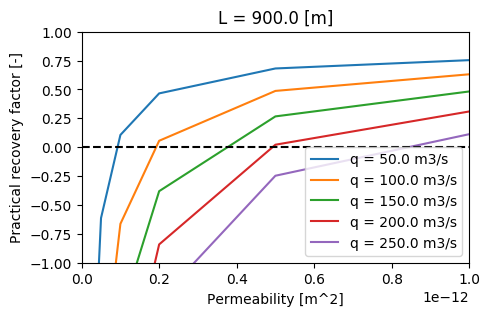

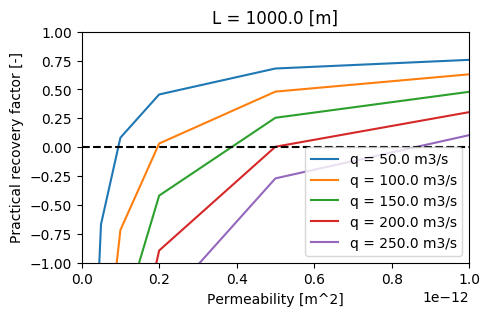

In [4]:
for L_well in L_range
    figure(figsize=(5,3))
    xlabel("Permeability [m^2]")
    ylabel("Practical recovery factor [-]")
    for q in flow_range
        df_temp = df_geo[(df_geo[:q_m3_s].==q) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:k_m2], df_temp[:R_pr], label = "q = $(q*3600) m3/s")
    end
    legend()
    plot([0, 1e-12], [0,0], "--k")
    axis([0, 1e-12, -1,1])
    title("L = $L_well [m]")
end

### Effect of flow rate
Change the flow rate in different well spacing in different reservoirs

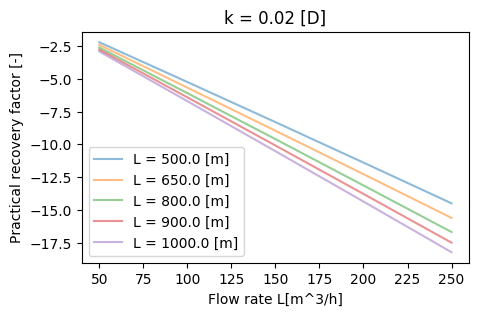

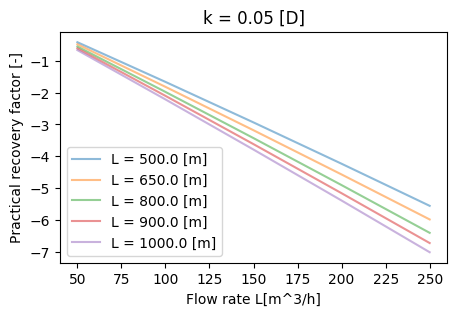

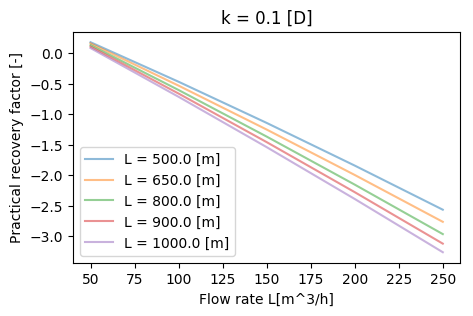

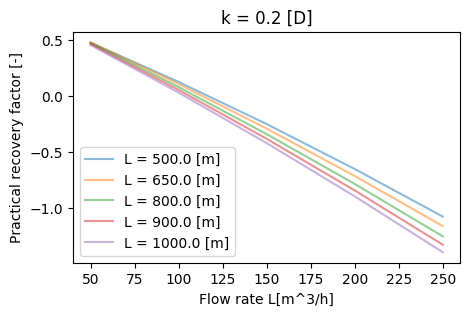

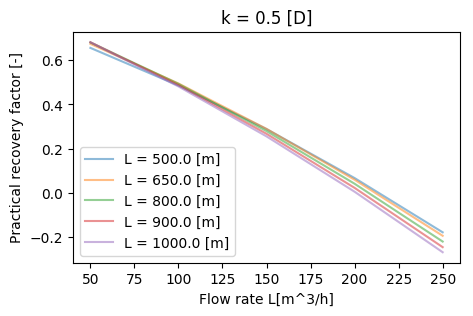

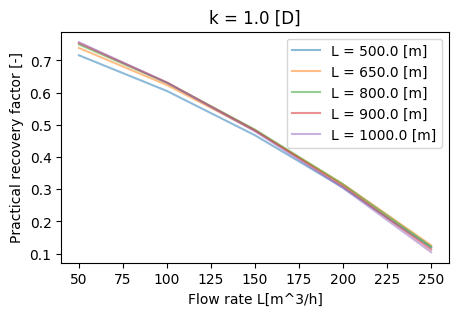

In [5]:
for k_res in k_range
    figure(figsize=(5,3))
    xlabel("Flow rate \L[m^3/h]")
    ylabel("Practical recovery factor [-]")
    for L_well in L_range
        df_temp = df_geo[(df_geo[:k_m2].==k_res) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:q_m3_s]*3600, df_temp[:R_pr], alpha = 0.5, label = "L = $L_well [m]")
    end
    legend()
    #plot([0, 1e-12], [0,0], "--k")
    #axis([0, 1e-12, -1,1])
    title("k = $(k_res*1e12) [D]")
end

### Effect of flow rate on the project life time
Conclusion: project life time does not depend on the permeability of the reservoir. It is important for the project to have an acceptable lifetime to justify the capital investments.

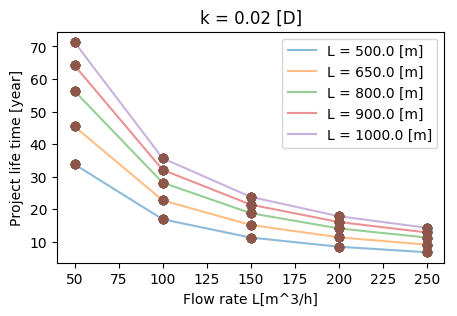

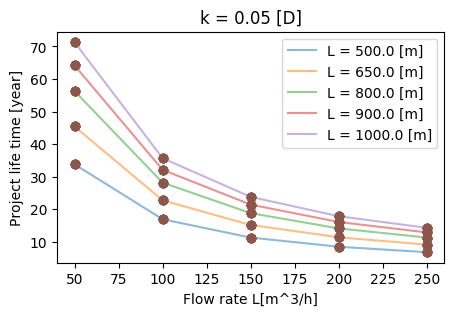

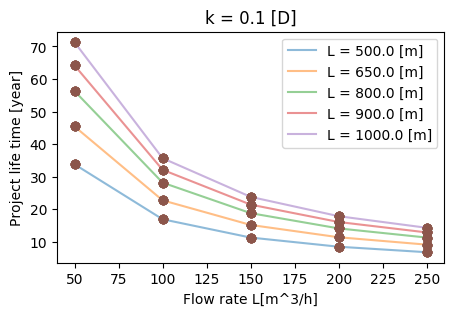

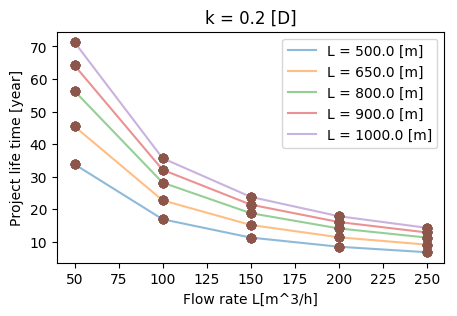

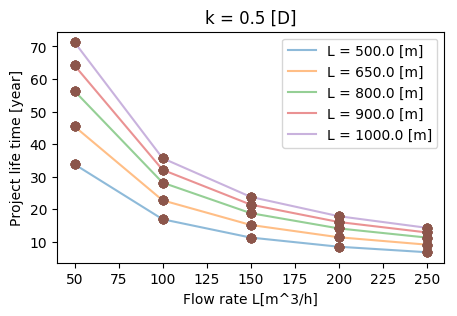

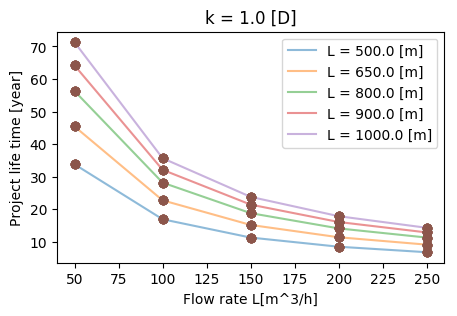

In [6]:
for k_res in k_range
    figure(figsize=(5,3))
    xlabel("Flow rate \L[m^3/h]")
    ylabel("Project life time [year]")
    for L_well in L_range
        df_temp = df_geo[(df_geo[:k_m2].==k_res) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:q_m3_s]*3600, df_temp[:t_life_s]/(3600*24*365), alpha = 0.5, label = "L = $L_well [m]")
    end
    legend()
    #plot([0, 1e-12], [0,0], "--k")
    #axis([0, 1e-12, -1,1])
    plot(df_geo[:q_m3_s]*3600, df_geo[:t_life_s]/(3600*24*365), "o")
    title("k = $(k_res*1e12) [D]")
end

### CO2 emission:

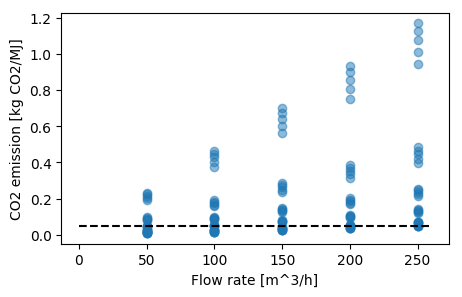

PyObject <matplotlib.text.Text object at 0x7f0445294a10>

In [7]:
figure(figsize=(5,3))
plot(df_geo[:q_m3_s]*3600, df_geo[:c_CO2], alpha = 0.5, "o")
plot([0, 260], [0.05, 0.05], "--k")
xlabel("Flow rate [m^3/h]")
ylabel("CO2 emission [kg CO2/MJ]")